In [2867]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import scipy.stats as stats 

from collections import Counter

df=pd.read_csv('db/TAI_VG_Prueba_F.csv')


Puntaje por departamento. El departamento es explicativo del puntaje?
La zona por departamento es explicativo del puntaje?
Es el Quintil explicativo del puntaje? Varian dentro del mismo nivel, por departamento o por zona? Varia por el sexo o la edad?

In [2868]:
%matplotlib inline
rcParams['figure.figsize']=5,4

In [2869]:
df.info()
df.describe()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GradoCodigo         20000 non-null  int64  
 1   GrupoNombre         20000 non-null  object 
 2   DepartamentoNombre  20000 non-null  object 
 3   Tipo_Centro         20000 non-null  object 
 4   Zona                20000 non-null  object 
 5   Quintil             20000 non-null  object 
 6   Instituto           8239 non-null   object 
 7   Sexo                19948 non-null  object 
 8   Edad                16488 non-null  float64
 9   Punto_VG            20000 non-null  object 
 10  CEFR_VG             20000 non-null  object 
 11  Programa            16852 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.8+ MB


,GradoCodigo,GrupoNombre,DepartamentoNombre,Tipo_Centro,Zona,Quintil,Instituto,Sexo,Edad,Punto_VG,CEFR_VG,Programa
count,20000.000000,20000,20000,20000,20000,20000,8239,19948,16488.000000,20000,20000,16852
unique,NaN,68,19,3,2,7,11,2,NaN,19815,6,3
top,NaN,A,Montevideo,DGEIP,Urbana,Quintil 5,British Council,M,NaN,900,A1.2,SL
freq,NaN,10541,3937,16891,19555,4360,3595,10170,NaN,111,5784,8607
mean,4.545300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.886160,NaN,NaN,NaN
std,1.405186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.034004,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN
25%,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN
50%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN
75%,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,NaN


Cambiar tipos de datos erroneos de algunas variables

1. Punto_VG figura como una string, pero esta variable representan los puntos que se sacaron los alumnos en las pruebas. Podria ser interesante transformarla a float y ver las estadisticas descriptivas que arroja.
2. La variable sexo y zona, tienen unicamente dos valores posibles por tanto, son variables categorica por lo que la transformare Dummies 

In [2870]:
df["Punto_VG"] = df['Punto_VG'].str.replace(',', '.').astype(float)


A veces llegan valores que no son reconocidos y tienen ?, los cambio por nan (not a number)

In [2871]:
df.replace("?",np.nan, inplace=True)

In [2872]:
valores_nulos=df.isnull()
valores_nulos.head(10)

,GradoCodigo,GrupoNombre,DepartamentoNombre,Tipo_Centro,Zona,Quintil,Instituto,Sexo,Edad,Punto_VG,CEFR_VG,Programa
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,False,False
6,False,False,False,False,False,False,False,False,True,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,True,False,False,True
9,False,False,False,False,False,False,False,False,False,False,False,False


Contando los valores nulos
Luego de contarlos podemos identificar que hay 20000 filas de datos y 12 columnas. De las cuales, 4 contienen valores nulos 
1. Instituto tiene 8239 valores nulos
2. Sexo tiene 52 valores nulos
3. Edad tiene 3512 valores nulos
4. Programa tiene 3148 valores nulos

Es importante tratar este problema, de lo contrario podria afectar los resultados estadisticos. 
Una de las maneras de solucionar la falta de datos es eliminando filas o columnas. Eliminar filas no me parece adecuado ya que estaria perdiendo datos de otras columnas. 
Eliminar la columna podria ser mas acertado; de todos modos, teniendo en cuenta que la variable con la mayor cantidad de datos nulos es Instituto, con una proporcion del 41%, es una variable categorica preferira seguir estudiandola antes de eliminarla. 

Las otras opciones son reemplazar los datos por la media o la moda.

In [2873]:
for column in valores_nulos.columns.values.tolist():
    print(column)
    print(valores_nulos[column].value_counts())
    print("")

GradoCodigo
False    20000
Name: GradoCodigo, dtype: int64

GrupoNombre
False    20000
Name: GrupoNombre, dtype: int64

DepartamentoNombre
False    20000
Name: DepartamentoNombre, dtype: int64

Tipo_Centro
False    20000
Name: Tipo_Centro, dtype: int64

Zona
False    20000
Name: Zona, dtype: int64

Quintil
False    20000
Name: Quintil, dtype: int64

Instituto
True     11761
False     8239
Name: Instituto, dtype: int64

Sexo
False    19948
True        52
Name: Sexo, dtype: int64

Edad
False    16488
True      3512
Name: Edad, dtype: int64

Punto_VG
False    20000
Name: Punto_VG, dtype: int64

CEFR_VG
False    20000
Name: CEFR_VG, dtype: int64

Programa
False    16852
True      3148
Name: Programa, dtype: int64



In [2874]:
df['DepartamentoNombre'].unique()

array(['Montevideo', 'Canelones', 'Maldonado', 'PaysandÃº', 'Cerro Largo',
       'Salto', 'Lavalleja', 'RÃ\xado Negro', 'Rocha', 'Soriano',
       'Rivera', 'Florida', 'San JosÃ©', 'Artigas', 'TacuarembÃ³',
       'Flores', 'Colonia', 'Treinta y Tres', 'Durazno'], dtype=object)

In [2875]:
df['DepartamentoNombre'].unique()
df['DepartamentoNombre'].replace('PaysandÃº', 'Paysandu', inplace=True)
df['DepartamentoNombre'].replace('RÃ\xado Negro', 'Rio Negro', inplace=True)
df['DepartamentoNombre'].replace('San JosÃ©', 'San Jose', inplace=True)
df['DepartamentoNombre'].replace('TacuarembÃ³', 'Tacuarembo', inplace=True)
df['DepartamentoNombre'].unique()


array(['Montevideo', 'Canelones', 'Maldonado', 'Paysandu', 'Cerro Largo',
       'Salto', 'Lavalleja', 'Rio Negro', 'Rocha', 'Soriano', 'Rivera',
       'Florida', 'San Jose', 'Artigas', 'Tacuarembo', 'Flores',
       'Colonia', 'Treinta y Tres', 'Durazno'], dtype=object)

Limpieza de variable Quintil

In [2876]:
#Reemplazar 0 por nan (son demasiados como para cambiarlos por otro valor pero no tantos como para que afecte los resultados finales) y 
# reemplazar Sin especificar por el valor mas frecuente.
df['Quintil'].value_counts()
df['Quintil'].value_counts().idxmax()
df['Quintil'].replace('Sin clasificar', "Quintil 5", inplace=True)
df.replace("0", np.nan, inplace = True)
df.dropna(subset=["Quintil"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df['Quintil'].value_counts()
df.head(10)
# Reclasifica los Quintiles en variables numericas para manipulacion mas sencilla
df['Quintil_rank']=df['Quintil']
df.Quintil_rank.replace(['Quintil 1','Quintil 2','Quintil 3','Quintil 4','Quintil 5'],[1,2,3,4,5], inplace=True)
df.Quintil_rank.astype('int64')
# Reclasifica los Grupos en variables numericas para manipulacion mas sencilla
df['Grupos_ranking']=df['GradoCodigo']
df.Grupos_ranking.replace(['4','5','6'],[4,5,6], inplace=True)
df.Grupos_ranking.astype('int64')
#Reclasifica los Deparamentos
df['Departamento_Ranking']=df['DepartamentoNombre']
df.Departamento_Ranking.replace(['Montevideo', 'Canelones', 'Maldonado', 'Paysandu', 'Salto',
       'Lavalleja', 'Rio Negro', 'Rocha', 'Soriano', 'Rivera', 'Florida',
       'San Jose', 'Artigas', 'Tacuarembo', 'Flores', 'Colonia',
       'Cerro Largo', 'Treinta y Tres', 'Durazno'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], inplace=True)
df.Departamento_Ranking.astype('int64')



0         1
1         2
2         1
3         3
4         4
         ..
16886    16
16887    18
16888     2
16889     7
16890     3
Name: Departamento_Ranking, Length: 16891, dtype: int64

Limpieza de variable Programa

In [2877]:
df['Programa'].value_counts()
df['Programa'].isna().sum()
df['Programa'].value_counts().idxmax()

'SL'

In [2878]:
#Teniendo en cuenta que hay unicamente 39 valores sin datos, voy a reemplazarlos por el mas frecuente.
df["Programa"].replace(np.nan, "SL", inplace=True)

Sexo tiene unicamente 26 datos nulos, voy a reemplazarlos por el valor mas frecuente

In [2879]:
df['Sexo'].value_counts().idxmax()

'M'

In [2880]:
# Reemplazo
df["Sexo"].replace(np.nan, "M", inplace=True)
df['Sexo'].isna().sum()

0

La edad tiene 406 valores nulos, pero la distribucion de la misma es de 1.03400, el valor maximo es de 18 y el valor minimo de 10, la media es de 11.88. Siendo que la dispersion es baja, decidi sustituir los valores nulos por la media de la variable

In [2881]:
avg_edad=df['Edad'].astype('float').mean(axis=0)
print("Average edad:", avg_edad)
#reemplazo
df['Edad'].replace(np.nan, avg_edad, inplace=True)

Average edad: 11.886159631246967


Tratamiento de Atipicos
1-Visualizacion de datos para tener una primer impresion
2-Eliminacion de atipicos por metodologia Tukey

In [2882]:
#Punto_VG
#Existe una dispersion relativamente alta. Se intentara disminuir la misma, eliminando atipicos
print('El desvio de Punto_VG es: ' +str(df['Punto_VG'].std()) + '\nLa media de Punto_VG es: '+str(df['Punto_VG'].mean()))

El desvio de Punto_VG es: 84.08034763140701
La media de Punto_VG es: 477.2191258658457


Rango IQR

In [2883]:
Q1=df['Punto_VG'].quantile(0.25)
Q3=df['Punto_VG'].quantile(0.75)
IQR=Q3-Q1
IQR

102.06130000000007

In [2884]:
print('Base de datos antes del tratamiento de outliers', df.shape)

Base de datos antes del tratamiento de outliers (16891, 15)


In [2885]:
#Removiendo los outliers que tienen valores menores o mayores a los extremos

df=df[~((df['Punto_VG']<(Q1-1.5*IQR))|(df['Punto_VG']>(Q3+1.5*IQR)))]

print('Base de datos despues del tratamiento de outliers', df.shape)

Base de datos despues del tratamiento de outliers (16573, 15)


In [2886]:

print('El desvio de Punto_VG es: ' +str(df['Punto_VG'].std()) + '\nLa media de Punto_VG es: '+str(df['Punto_VG'].mean()))

#Se puede calcular si esta varianza es la minima varianza (alcanza la varianza de cramer rao)?

El desvio de Punto_VG es: 75.6490423480866
La media de Punto_VG es: 473.8180516502745


Renombrar algunas variables

In [2887]:
df=df.rename(columns={'GradoCodigo':'GradoEscolar'})
df=df.rename(columns={'Punto_VG':'PuntajeObtenido'})
df=df.rename(columns={'CEFR_VG':'NivelAlcanzado'})
df.head()

,GradoEscolar,GrupoNombre,DepartamentoNombre,Tipo_Centro,Zona,Quintil,Instituto,Sexo,Edad,PuntajeObtenido,NivelAlcanzado,Programa,Quintil_rank,Grupos_ranking,Departamento_Ranking
0,5,C,Montevideo,DGEIP,Urbana,Quintil 2,English Services,F,12.0,448.2273,A1.2,CEI,2,5,1
1,4,B,Canelones,DGEIP,Urbana,Quintil 4,Inc,M,11.0,405.5650,A1.1,CEI,4,4,2
2,6,A,Montevideo,DGEIP,Urbana,Quintil 5,NaN,F,13.0,615.7466,B1,SL,5,6,1
3,4,C,Maldonado,DGEIP,Urbana,Quintil 4,NaN,M,10.0,468.2275,A1.2,SL,4,4,3
4,6,A,Paysandu,DGEIP,Urbana,Quintil 4,NaN,F,13.0,498.1373,A1.2,SL,4,6,4


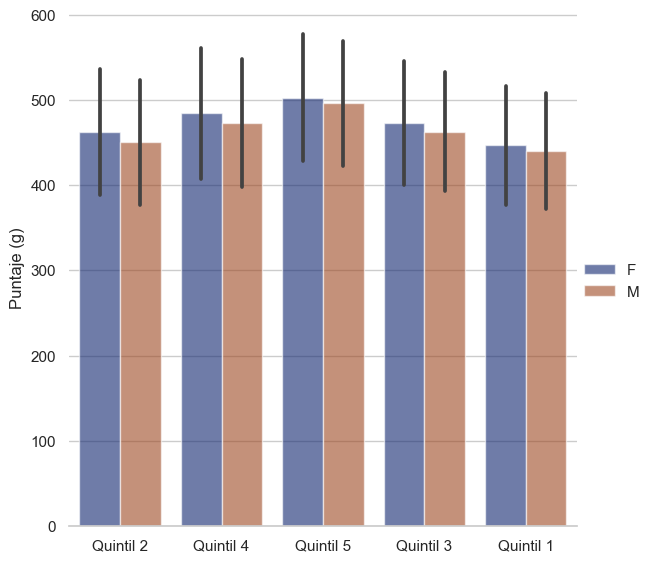

In [2888]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="Quintil", y="PuntajeObtenido", hue="Sexo",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Puntaje (g)")
g.legend.set_title("")

Transformacion de variables categoricas a Dummies

Combinar la tabla original con la nueva tabla de Femenino y Masculino. Eliminar posteriormente, la columna de sexo
Combinar la tabla original con la nueva tabla Rural y Urbana. Eliminar posteriormente, la columna de Zona

In [2889]:
dummy_sexo=pd.get_dummies(df["Sexo"])
dummy_sexo.rename(columns={'F':'Femenino','M':'Masculino'}, inplace=True)

dummy_zona=pd.get_dummies(df["Zona"])

df=pd.concat([df,dummy_sexo],axis=1)
df.drop("Sexo",axis=1,inplace=True)
df=pd.concat([df,dummy_zona],axis=1)
df.drop("Zona",axis=1,inplace=True)

In [2890]:
df.describe()

,GradoEscolar,Edad,PuntajeObtenido,Quintil_rank,Grupos_ranking,Departamento_Ranking,Femenino,Masculino,Rural,Urbana
count,16573.000000,16573.000000,16573.000000,16573.000000,16573.000000,16573.000000,16573.000000,16573.000000,16573.000000,16573.000000
mean,5.031980,11.880832,473.818052,3.350208,5.031980,6.648102,0.488385,0.511615,0.017257,0.982743
std,0.810974,1.023256,75.649042,1.331115,0.810974,5.424997,0.499880,0.499880,0.130231,0.130231
min,4.000000,10.000000,271.882600,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,11.000000,424.461600,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,5.000000,12.000000,473.140300,3.000000,5.000000,5.000000,0.000000,1.000000,0.000000,1.000000
75%,6.000000,13.000000,524.098600,5.000000,6.000000,11.000000,1.000000,1.000000,0.000000,1.000000
max,6.000000,18.000000,679.886000,5.000000,6.000000,19.000000,1.000000,1.000000,1.000000,1.000000


Resultados
DepartamentoNombre

Luego de haber eliminado los datos atipicos, la base de datos quedo con un total de 16573 datos. 
Los alumnos tienen en promedio 11 años, obtienen en promedio 473 puntos. El 48% son Mujeres y el 51% Hombres y la gran mayoria (98%) viven en zona Urbana.

Preguntas a responder
1. El Departamento donde vive el alumno influye en el puntaje que saca? NO
2. El Departamento donde vive el alumno influye el nivel que alcanza?
4. Hay diferencia entre Zonas por departamento? Es decir, la zona rural en Canelones, difiere en puntaje con la de Salto?
5. Hay diferencia entre grupos de distintas edades, sexo, nivel socioeconomico, segun el departamento o la zona?




Text(0.5, 1.0, 'PuntajeObtenido')

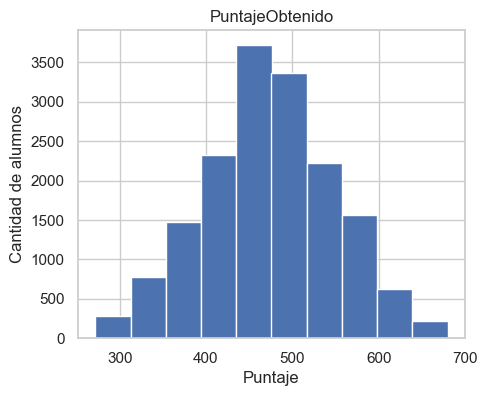

In [2891]:
#En esta seccion se muestra el Histograma de los puntajes Obtenidos por los alumnos al rededor del pais, de las zonas y quintiles. Viendo el grafico podemos inferir
#que los datos estan distribuidos de forma relativamente uniforme, centrados al rededor de la media, lo cual aporta mayor evidencia de que se hizo correctamente el
#tratamiento de atipicos. De todos modos se debera estudiar el impacto que tiene en esta variable las otras variables de la base de datos. 


plt.hist(df["PuntajeObtenido"])

plt.xlabel("Puntaje")
plt.ylabel("Cantidad de alumnos")
plt.title("PuntajeObtenido")

C:\Users\mariana\AppData\Local\Temp\ipykernel_736\453493093.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=df['DepartamentoNombre'],y=df['PuntajeObtenido'], estimator=np.median, ci='sd')


<AxesSubplot: xlabel='DepartamentoNombre', ylabel='PuntajeObtenido'>

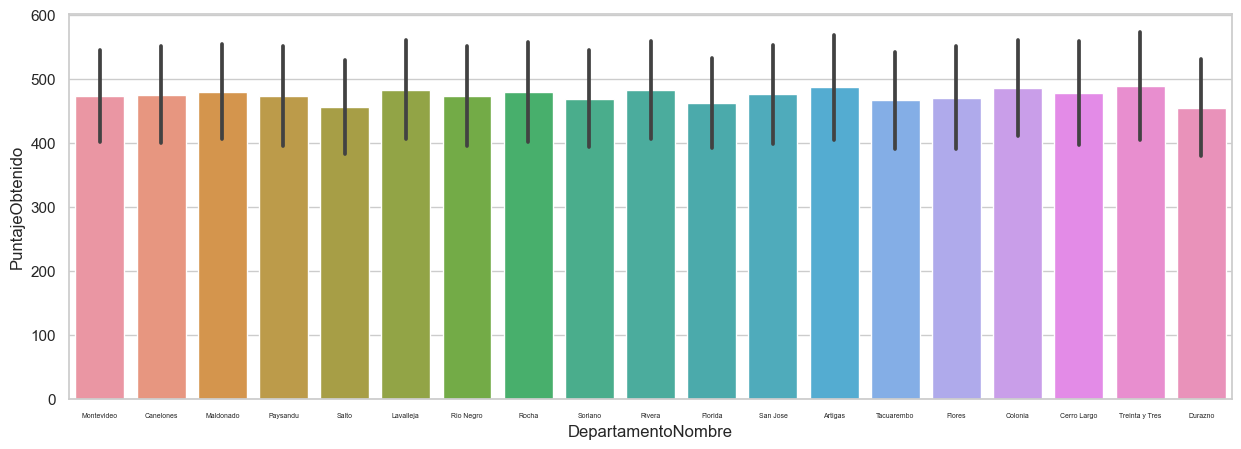

In [2892]:
plt.figure(figsize=(15,5))
plt.xticks(fontsize=5)
#plt.set_ylim(400,600)
#plt.bar(df['DepartamentoNombre'],df['PuntajeObtenido'])

sns.barplot(x=df['DepartamentoNombre'],y=df['PuntajeObtenido'], estimator=np.median, ci='sd')


El Departamento donde vive el alumno influencia el puntaje que saca?
Mirando el grafico de barras da la idea de que el puntaje no varia notortiamente entre los departamentos. Sin embargo, para responder a esta pregunta es importante considerar la cantidad de poblacion. La cantidad de alumnos en Montevideo es notariamente mas eleveada que la de Artigas. Esta disparidad de cantidades puede afectar el analisis. Para amortiguar este problema, comenzaremos agrupando por departamento.


C:\Users\mariana\AppData\Local\Temp\ipykernel_736\183446277.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=cantAlumnQuintil['DepartamentoNombre'],y=df['PuntajeObtenido'], estimator=np.median, ci='sd')


<AxesSubplot: xlabel='DepartamentoNombre', ylabel='PuntajeObtenido'>

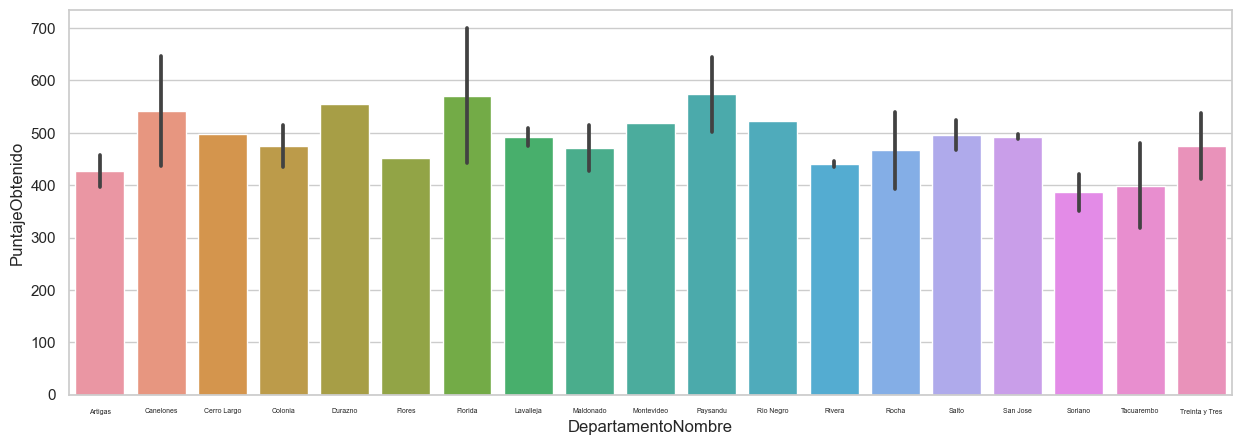

In [2893]:


cantAlumnQuintil=df.groupby(['DepartamentoNombre','Urbana','Rural'], as_index=False)["PuntajeObtenido"].mean()
cantAlumnQuintil.head(50)
plt.figure(figsize=(15,5))
plt.xticks(fontsize=5)
sns.barplot(x=cantAlumnQuintil['DepartamentoNombre'],y=df['PuntajeObtenido'], estimator=np.median, ci='sd')

C:\Users\mariana\AppData\Local\Temp\ipykernel_736\1213652539.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=cantAlumnQuintil['DepartamentoNombre'],y=df['PuntajeObtenido'], estimator=np.median, ci='sd')


<AxesSubplot: xlabel='DepartamentoNombre', ylabel='PuntajeObtenido'>

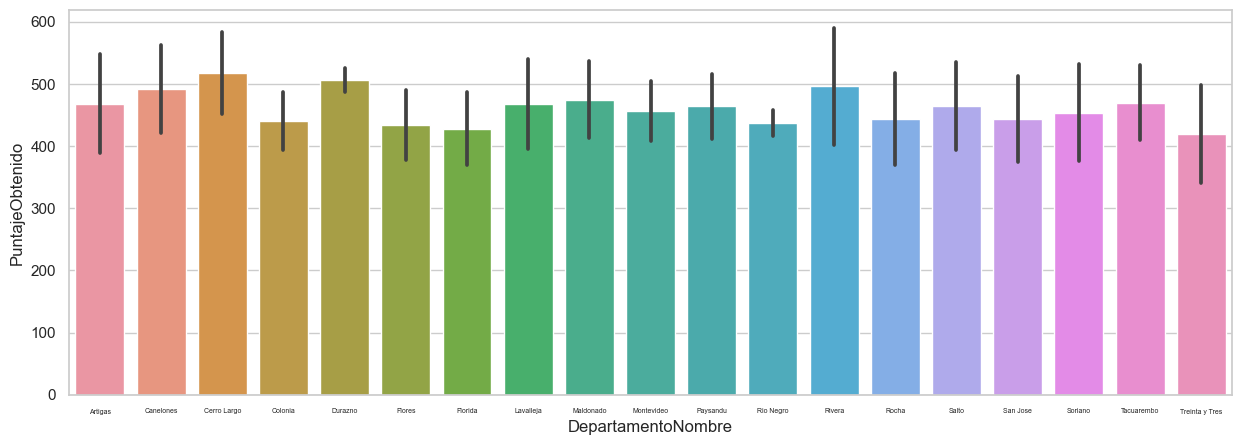

In [2894]:
cantAlumnQuintil=df.groupby(['DepartamentoNombre','Urbana','Rural','Quintil'], as_index=False)["PuntajeObtenido"].mean()
cantAlumnQuintil.head(50)
plt.figure(figsize=(15,5))
plt.xticks(fontsize=5)
sns.barplot(x=cantAlumnQuintil['DepartamentoNombre'],y=df['PuntajeObtenido'], estimator=np.median, ci='sd')


In [2895]:
#x=df['DepartamentoNombre']
#y=df['Quintil']
#sns.regplot(x, y, data=df['PuntajeObtenido'])

Como se puede ver los datos en los departamentos y agrupados por quintiles no tienen la misma dispersion. En Artigas hay una dispersion mas grande que en Canelones. Esto nos esta dando un indicador que en departamentos como Artigas, Cerro Largo, Salto y Soriano, los alumnos obtienen en mayor proporcion puntajes mas alejados de la media de su grupo. Es claro entonces, que el departamento como variable aislada si bien no es del todo explicativa del puntaje de los alumnos, si lo es cuando se junta con el Quintil, lo que se traduce a una posible existencia de correlacion.

In [2896]:
df_gptest = df[['DepartamentoNombre','Quintil','PuntajeObtenido']]
grouped_test1 = df_gptest.groupby(['DepartamentoNombre','Quintil'],as_index=False).mean()
grouped_test1

,DepartamentoNombre,Quintil,PuntajeObtenido
0,Artigas,Quintil 1,450.350939
1,Artigas,Quintil 2,460.814660
2,Artigas,Quintil 4,493.174886
3,Artigas,Quintil 5,578.214950
4,Canelones,Quintil 1,452.605901
...,...,...,...
82,Tacuarembo,Quintil 4,483.140256
83,Tacuarembo,Quintil 5,496.872866
84,Treinta y Tres,Quintil 2,498.088073
85,Treinta y Tres,Quintil 3,468.211511


In [2897]:
grouped_pivot = grouped_test1.pivot(index='DepartamentoNombre',columns='Quintil')
grouped_pivot

PuntajeObtenido                                      \
Quintil                  Quintil 1   Quintil 2   Quintil 3   Quintil 4   
DepartamentoNombre                                                       
Artigas                 450.350939  460.814660         NaN  493.174886   
Canelones               452.605901  450.129993  461.845164  481.998126   
Cerro Largo             438.100889  442.267541  465.081866  494.271784   
Colonia                        NaN         NaN  460.843387  499.248768   
Durazno                        NaN  464.055983  442.782021  437.289294   
Flores                         NaN  451.073212  472.949730  455.102108   
Florida                 441.723304  440.134263  460.394398  464.864555   
Lavalleja               438.757400  391.955200  451.390186  465.676416   
Maldonado               443.793165  478.024697  470.710387  490.552662   
Montevideo              438.885889  459.449713  460.854284  475.678535   
Paysandu                441.572437  455.979612  493.683908  462.340036   
Rio Negro               435.540933  475.974243  463.530616  473.864445   
Rivera                  462.385405  487.777495  548.565214  474.698768   
Rocha                          NaN  450.032557  471.788462  488.745505   
Salto                   435.362546  446.470524  462.104432  488.297598   
San Jose                440.857589  467.813001  479.941271  470.796260   
Soriano                 451.598966  446.471335  485.237457  462.258916   
Tacuarembo              429.603079  450.083903  467.259986  483.140256   
Treinta y Tres                 NaN  498.088073  468.211511  487.970665   

                                
Quintil              Quintil 5  
DepartamentoNombre              
Artigas             578.214950  
Canelones           498.182137  
Cerro Largo         504.141087  
Colonia             485.979723  
Durazno             505.325165  
Flores              517.370835  
Florida             474.485310  
Lavalleja           501.895490  
Maldonado           493.364370  
Montevideo          504.519473  
Paysandu            503.393346  
Rio Negro           530.474865  
Rivera              503.752714  
Rocha               502.876189  
Salto               473.943340  
San Jose            503.201296  
Soriano             496.688261  
Tacuarembo          496.872866  
Treinta y Tres             NaN

In [2898]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

PuntajeObtenido                                      \
Quintil                  Quintil 1   Quintil 2   Quintil 3   Quintil 4   
DepartamentoNombre                                                       
Artigas                 450.350939  460.814660    0.000000  493.174886   
Canelones               452.605901  450.129993  461.845164  481.998126   
Cerro Largo             438.100889  442.267541  465.081866  494.271784   
Colonia                   0.000000    0.000000  460.843387  499.248768   
Durazno                   0.000000  464.055983  442.782021  437.289294   
Flores                    0.000000  451.073212  472.949730  455.102108   
Florida                 441.723304  440.134263  460.394398  464.864555   
Lavalleja               438.757400  391.955200  451.390186  465.676416   
Maldonado               443.793165  478.024697  470.710387  490.552662   
Montevideo              438.885889  459.449713  460.854284  475.678535   
Paysandu                441.572437  455.979612  493.683908  462.340036   
Rio Negro               435.540933  475.974243  463.530616  473.864445   
Rivera                  462.385405  487.777495  548.565214  474.698768   
Rocha                     0.000000  450.032557  471.788462  488.745505   
Salto                   435.362546  446.470524  462.104432  488.297598   
San Jose                440.857589  467.813001  479.941271  470.796260   
Soriano                 451.598966  446.471335  485.237457  462.258916   
Tacuarembo              429.603079  450.083903  467.259986  483.140256   
Treinta y Tres            0.000000  498.088073  468.211511  487.970665   

                                
Quintil              Quintil 5  
DepartamentoNombre              
Artigas             578.214950  
Canelones           498.182137  
Cerro Largo         504.141087  
Colonia             485.979723  
Durazno             505.325165  
Flores              517.370835  
Florida             474.485310  
Lavalleja           501.895490  
Maldonado           493.364370  
Montevideo          504.519473  
Paysandu            503.393346  
Rio Negro           530.474865  
Rivera              503.752714  
Rocha               502.876189  
Salto               473.943340  
San Jose            503.201296  
Soriano             496.688261  
Tacuarembo          496.872866  
Treinta y Tres        0.000000

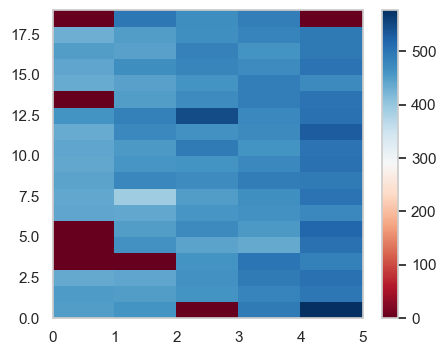

In [2899]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

El quintil 5 de Montevideo esta altamente relacionado con el puntaje de los alumnos. Es decir, gran parte del puntaje promedio de esta zona se explica por el quintil 5.
A diferencia del quintil 3 que no tiene casi 

In [2901]:
df.corr()

C:\Users\mariana\AppData\Local\Temp\ipykernel_736\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,GradoEscolar,Edad,PuntajeObtenido,Quintil_rank,Grupos_ranking,Departamento_Ranking,Femenino,Masculino,Rural,Urbana
GradoEscolar,1.000000,0.787868,0.232364,0.035797,1.000000,-0.010938,-0.001019,0.001019,0.002773,-0.002773
Edad,0.787868,1.000000,0.097373,-0.029846,0.787868,-0.062922,-0.034768,0.034768,0.000690,-0.000690
PuntajeObtenido,0.232364,0.097373,1.000000,0.242081,0.232364,-0.008039,0.062195,-0.062195,0.019746,-0.019746
Quintil_rank,0.035797,-0.029846,0.242081,1.000000,0.035797,0.021337,0.000491,-0.000491,-0.010498,0.010498
Grupos_ranking,1.000000,0.787868,0.232364,0.035797,1.000000,-0.010938,-0.001019,0.001019,0.002773,-0.002773
Departamento_Ranking,-0.010938,-0.062922,-0.008039,0.021337,-0.010938,1.000000,0.011065,-0.011065,0.054974,-0.054974
Femenino,-0.001019,-0.034768,0.062195,0.000491,-0.001019,0.011065,1.000000,-1.000000,-0.002482,0.002482
Masculino,0.001019,0.034768,-0.062195,-0.000491,0.001019,-0.011065,-1.000000,1.000000,0.002482,-0.002482
Rural,0.002773,0.000690,0.019746,-0.010498,0.002773,0.054974,-0.002482,0.002482,1.000000,-1.000000
Urbana,-0.002773,-0.000690,-0.019746,0.010498,-0.002773,-0.054974,0.002482,-0.002482,-1.000000,1.000000


La correlacion nos indica si una variable influye en otra. Por ejemplo, podemos ver que a medida que aumenta el quintil (pasa del mas critico al menos critico) el puntaje de los alumnos tambien aumento. Esto se puede ver en el resultado positivo de la correlacion. Si volvemos a los graficos de caja, este analisis arroja aun mas evidencia, lo que se comento anteriormente.
La edad es otro indicador que dio una correlacion positiva; vemos que a medida que aumenta la edad, el puntaje tambien aumenta. 

Grafico de barras

<AxesSubplot: xlabel='Edad', ylabel='PuntajeObtenido'>

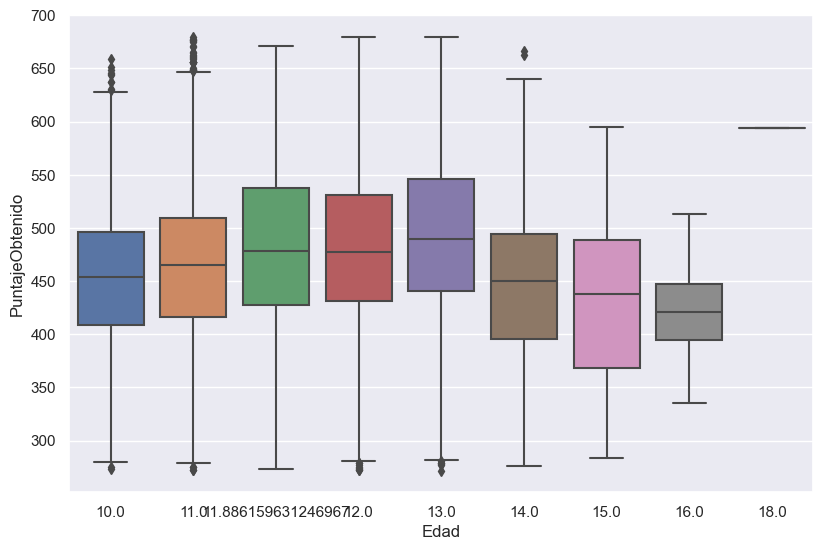

In [2902]:
sns.set(rc={'figure.figsize':(9.6,6.20)})
sns.boxplot(x="Edad", y="PuntajeObtenido",data=df)

La distribucion de los datos entre las edades de los alumnos muesta un comportamiento lo suficientemente distinto para considerar a la edad como un buen predictor del puntaje. 

Creacion de Histograma de Grupos

In [2903]:
dfAux=df
cantAlumnGrupo=dfAux.groupby(["GrupoNombre","GradoEscolar","DepartamentoNombre"], as_index=False)["PuntajeObtenido"].count()
cantAlumnGrupo.rename(columns={'PuntajeObtenido':'Cantidad'}, inplace=True)
cantAlumnGrupo.head(30)
#el Grupo A es el que tiene la mayor cantidad de alumnos, seguido por el B, el C y por ultimo con muy pocos alumnos el D y el E

,GrupoNombre,GradoEscolar,DepartamentoNombre,Cantidad
0,A,4,Artigas,61
1,A,4,Canelones,437
2,A,4,Cerro Largo,87
3,A,4,Colonia,106
4,A,4,Durazno,21
5,A,4,Flores,68
6,A,4,Florida,200
7,A,4,Lavalleja,50
8,A,4,Maldonado,200
9,A,4,Montevideo,556


Media del PuntajeObtenido de la agrupacion de GrupoNombre, GradoEscolar

In [2904]:

cantAlumnGrupo=dfAux.groupby(["GrupoNombre","GradoEscolar","DepartamentoNombre"], as_index=False)["PuntajeObtenido"].mean()

cantAlumnGrupo.rename(columns={'PuntajeObtenido':'Minimo'}, inplace=True)

cantAlumnGrupo.head(30)


,GrupoNombre,GradoEscolar,DepartamentoNombre,Minimo
0,A,4,Artigas,440.247862
1,A,4,Canelones,450.423719
2,A,4,Cerro Largo,440.748591
3,A,4,Colonia,457.925470
4,A,4,Durazno,428.443490
5,A,4,Flores,440.066853
6,A,4,Florida,445.371762
7,A,4,Lavalleja,466.674294
8,A,4,Maldonado,452.267055
9,A,4,Montevideo,455.694143


Desvio estandar del PuntajeObtenido de la agrupacion de GrupoNombre, GradoEscolar

In [2905]:
cantAlumnGrupo=df.groupby(["GrupoNombre","GradoEscolar","DepartamentoNombre"], as_index=False)["PuntajeObtenido"].std()
cantAlumnGrupo.rename(columns={'PuntajeObtenido':'Desvio estandar'}, inplace=True)
cantAlumnGrupo.head(20)

,GrupoNombre,GradoEscolar,DepartamentoNombre,Desvio estandar
0,A,4,Artigas,78.266608
1,A,4,Canelones,64.501328
2,A,4,Cerro Largo,70.999435
3,A,4,Colonia,64.439027
4,A,4,Durazno,77.533211
5,A,4,Flores,74.226401
6,A,4,Florida,66.780954
7,A,4,Lavalleja,80.044354
8,A,4,Maldonado,68.039783
9,A,4,Montevideo,68.531425


<AxesSubplot: xlabel='GrupoNombre', ylabel='PuntajeObtenido'>

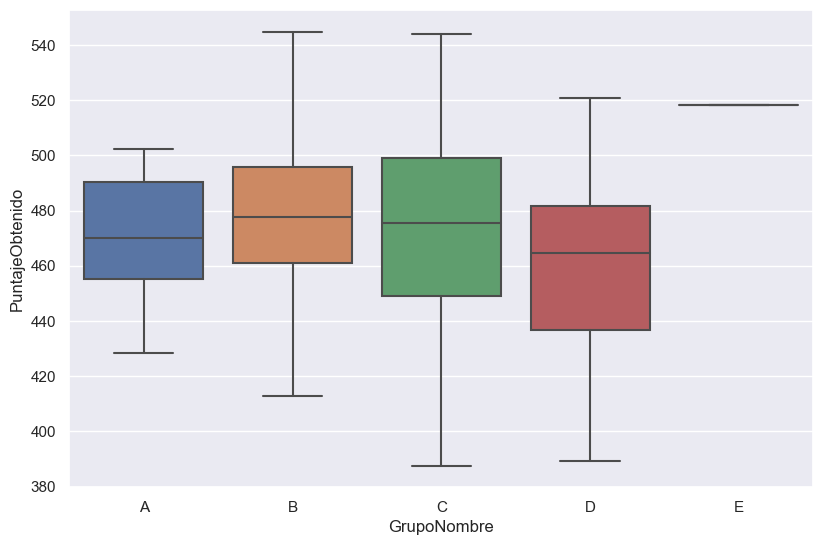

In [2906]:
cantAlumnGrupo=df.groupby(["GrupoNombre","GradoEscolar","DepartamentoNombre"], as_index=False,)["PuntajeObtenido"].mean()
df3=df
#sns.set(rc={'figure.figsize':(9.6,6.20)})
sns.boxplot(x="GrupoNombre", y="PuntajeObtenido",data=cantAlumnGrupo)

Divido a los grupos por densidad de alumnos, para comparar posteriormente los puntajes

Ver si las edades afectan al puntaje de los alumnos, por grupo. Estan en grupos de sus mismas edades o no? Es mejor que lo esten o no?

In [2907]:
r,p=stats.pearsonr(df['GradoEscolar'],df['PuntajeObtenido'])

print('r: '+str(round(r,4)))
print('p: '+str(round(p,4)))

r: 0.2324
p: 0.0


In [2908]:
df["GradoEscolar"] = df['GradoEscolar'].astype(int)
primerGrado=df[df.GradoEscolar==4]
segundoGrado=df[df.GradoEscolar==5]
t,p=stats.ttest_ind(primerGrado['PuntajeObtenido'],segundoGrado['PuntajeObtenido'])

print('t: '+str(round(t,2)))
print('p: '+str(round(p,2)))

#Da no insignificante

t: -14.79
p: 0.0


Siguiendo el grafico se puede decir que el Quintil es una variable que sirve para explicar los resultados de los alumnos

Grafico de barras

Pearson test
Con esto vemos que a medida que aumenta el nivel sociocultural aumenta el puntaje

In [2909]:
r,p=stats.pearsonr(df['Quintil_rank'],df['PuntajeObtenido'])

print('r: '+str(round(r,4)))
print('p: '+str(round(p,4)))

r: 0.2421
p: 0.0


In [2910]:
r,p=stats.pearsonr(df['Edad'],df['PuntajeObtenido'])

print('r: '+str(round(r,4)))
print('p: '+str(round(p,4)))

r: 0.0974
p: 0.0


Ya vimos, departamento, Quintil y edad 
Que sucede con el sexo y la zona?
Hacer el promedio de puntaje de las mujeres por quintil por una lado y compararlo con el promedio de hombres por quintil 

In [2911]:
cantMujeresUrbana=df.groupby([df ['Femenino'] == 1,df ['Urbana'] == 1,"DepartamentoNombre"], as_index=False)["PuntajeObtenido"].mean()
#cantMujeresQuintil.rename(columns={'PuntajeObtenido':'Desvio estandar'}, inplace=True)
cantMujeresUrbana.head(10)

,DepartamentoNombre,PuntajeObtenido
0,Artigas,557.986400
1,Canelones,505.123933
2,Colonia,427.273950
3,Florida,497.025613
4,Lavalleja,441.274167
5,Maldonado,650.316700
6,Paysandu,472.433715
7,Rivera,487.422243
8,Rocha,445.759500
9,Salto,459.677482


In [2912]:
cantMujeresRural=df.groupby([df ['Femenino'] == 1,df ['Rural'] == 1,"DepartamentoNombre"], as_index=False)["PuntajeObtenido"].mean()
#cantMujeresQuintil.rename(columns={'PuntajeObtenido':'Desvio estandar'}, inplace=True)
cantMujeresRural.head(10)

,DepartamentoNombre,PuntajeObtenido
0,Artigas,477.306885
1,Canelones,471.442720
2,Cerro Largo,474.421542
3,Colonia,475.099316
4,Durazno,443.880207
5,Flores,458.311144
6,Florida,458.321145
7,Lavalleja,470.111305
8,Maldonado,476.016417
9,Montevideo,474.155543


In [2913]:
cantHombresUrbana=df.groupby([df ['Masculino'] == 1,df ['Urbana'] == 1,"DepartamentoNombre"], as_index=False)["PuntajeObtenido"].mean()
#cantMujeresQuintil.rename(columns={'PuntajeObtenido':'Desvio estandar'}, inplace=True)
cantHombresUrbana.head(10)

,DepartamentoNombre,PuntajeObtenido
0,Artigas,464.960000
1,Canelones,489.332913
2,Colonia,536.699200
3,Florida,489.992667
4,Paysandu,453.172945
5,Rivera,523.083967
6,Salto,478.834823
7,San Jose,489.209270
8,Soriano,518.711573
9,Tacuarembo,478.586950


In [2914]:
cantHombresRural=df.groupby([df ['Masculino'] == 1,df ['Rural'] == 1,"DepartamentoNombre"], as_index=False)["PuntajeObtenido"].mean()
#cantMujeresQuintil.rename(columns={'PuntajeObtenido':'Desvio estandar'}, inplace=True)
cantHombresRural.head(10)

,DepartamentoNombre,PuntajeObtenido
0,Artigas,486.678316
1,Canelones,479.082060
2,Cerro Largo,481.384829
3,Colonia,487.299280
4,Durazno,459.906815
5,Flores,483.074841
6,Florida,465.281211
7,Lavalleja,482.585670
8,Maldonado,486.781192
9,Montevideo,476.324690
